In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df = pd.read_csv("Telco-Customer-Churn.csv")

df.drop(['customerID'], axis=1, inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

for col in df.columns:
    if df[col].dtype == 'object' and col != 'Churn':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [6]:
 from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))

# Neural Network (MLP)
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, solver='adam', random_state=42)
nn_model.fit(X_train, y_train)
nn_preds = nn_model.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_preds))
print("Classification Report:\n", classification_report(y_test, nn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, nn_preds))


Logistic Regression Accuracy: 0.793719806763285
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78      1021
           1       0.77      0.84      0.80      1049

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070

Confusion Matrix:
 [[765 256]
 [171 878]]
Decision Tree Accuracy: 0.7922705314009661
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1021
           1       0.80      0.79      0.79      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

Confusion Matrix:
 [[808 213]
 [217 832]]
Neural Network Accuracy: 0.8487922705314009
Classification Report:
               precision    recall  f1-score   support



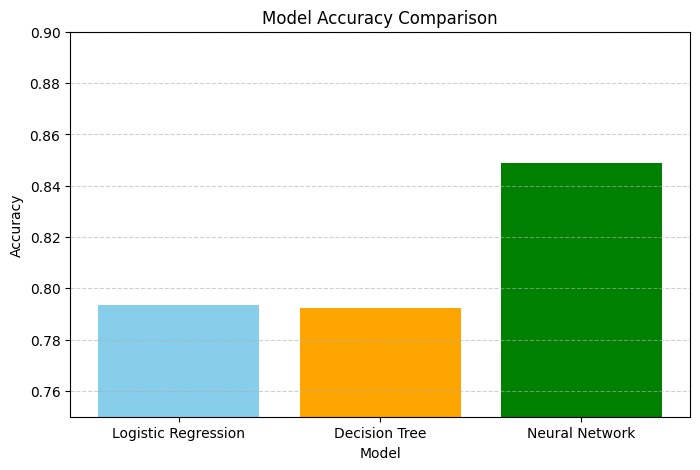

In [7]:
import matplotlib.pyplot as plt

accuracies = {
    "Logistic Regression": accuracy_score(y_test, lr_preds),
    "Decision Tree": accuracy_score(y_test, dt_preds),
    "Neural Network": accuracy_score(y_test, nn_preds)
}

plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'orange', 'green'])
plt.ylim(0.75, 0.90)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [8]:
import joblib

joblib.dump(nn_model, "best_churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

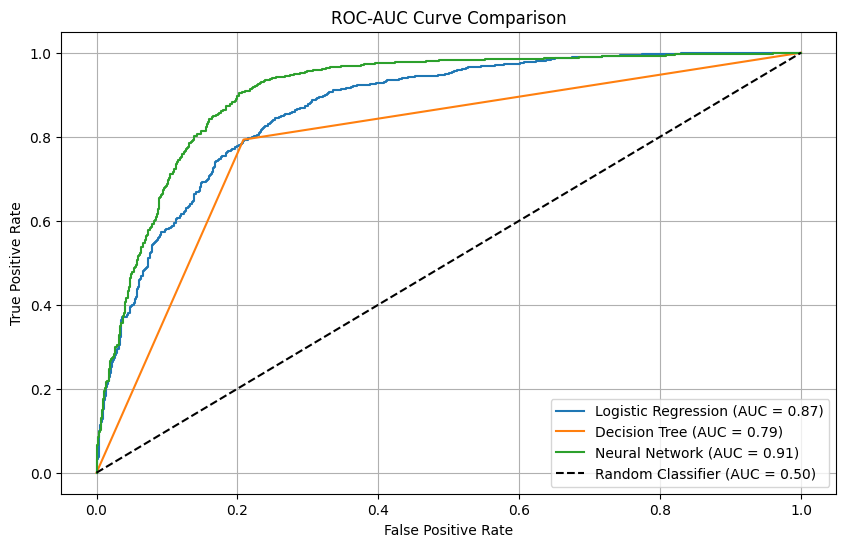

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Neural Network": nn_model
}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Classifier (AUC = 0.50)")
plt.title("ROC-AUC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()
